In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Toy dataset

N = 100_000
np.random.seed(2025)

# mixture of gaussians for lat/lon
centers = [(-25, 63), (-25.5, 66), (-12.5, 63)]
indices = np.random.choice(len(centers), size=N)
lons = np.array([centers[i][0] for i in indices]) + np.random.normal(0, 0.3, N)
lats = np.array([centers[i][1] for i in indices]) + np.random.normal(0, 0.3, N)

# Dates uniform from 2010 to Aug 2025
start_date = pd.to_datetime('2010-01-01').value
end_date = pd.to_datetime('2025-08-31').value
dates = pd.to_datetime(np.random.randint(start_date, end_date, N))

# other features
depth = np.random.uniform(20, 1000, N)
pok_ratio = np.random.beta(1.15, 1.65, N)

# ocean features: Normal(0,1)
ocean_cols = ['thetao', 'uo', 'vo', 'so', 'thetao_grad', 'chl', 'no3', 'nppv', 'o2', 'po4', 'si']
ocean_data = np.random.normal(0, 1, (N, len(ocean_cols)))

day_cos = np.cos(2 * np.pi * dates.dayofyear / 365.25)
day_sin = np.sin(2 * np.pi * dates.dayofyear / 365.25)

df = pd.DataFrame({
    'latitude': lats,
    'longitude': lons,
    'date': dates,
    'pok_ratio': pok_ratio,
    'depth': depth,
    'day_cos': day_cos,
    'day_sin': day_sin,
    'species': [np.nan]*N,
    'gear': [np.nan]*N,
    'weight': [np.nan]*N,
})
df[ocean_cols] = ocean_data

# save to csv
df.to_csv('data/toy_pok_dataset.csv', index=False)

df.head()


,latitude,longitude,date,pok_ratio,depth,day_cos,day_sin,species,gear,weight,...,uo,vo,so,thetao_grad,chl,no3,nppv,o2,po4,si
0,63.378708,-12.270573,2023-08-09 09:05:00.774847866,0.134773,844.099274,-0.789905,-0.613230,NaN,NaN,NaN,...,1.155853,-0.548234,-1.032685,-0.214677,-1.058231,-0.332375,0.962227,-0.423334,-0.301902,-0.347555
1,62.807528,-12.548728,2010-04-09 11:33:04.458345511,0.096411,157.337442,-0.131859,0.991269,NaN,NaN,NaN,...,2.545247,0.576636,0.071424,-0.645963,-1.086711,-0.140192,0.345296,0.486558,-0.996568,1.562176
2,62.899926,-12.853128,2017-07-27 13:21:33.774489252,0.110680,548.284803,-0.906232,-0.422781,NaN,NaN,NaN,...,0.827336,-1.499638,1.184140,1.639215,0.273580,0.263863,-1.082579,1.505036,-0.534677,-0.099535
3,63.370896,-12.696740,2013-02-24 13:15:10.085707553,0.790981,757.686362,0.584824,0.811160,NaN,NaN,NaN,...,-2.277803,0.641083,0.512649,0.020057,0.254223,-0.321052,-0.928326,-1.131531,-0.095174,-0.151419
4,62.801083,-24.985322,2014-03-03 18:34:44.981430885,0.190212,632.682469,0.483147,0.875539,NaN,NaN,NaN,...,0.311129,-1.534225,-0.022178,-0.362835,0.840830,-0.773127,-0.911297,0.028502,-0.350688,-1.208803


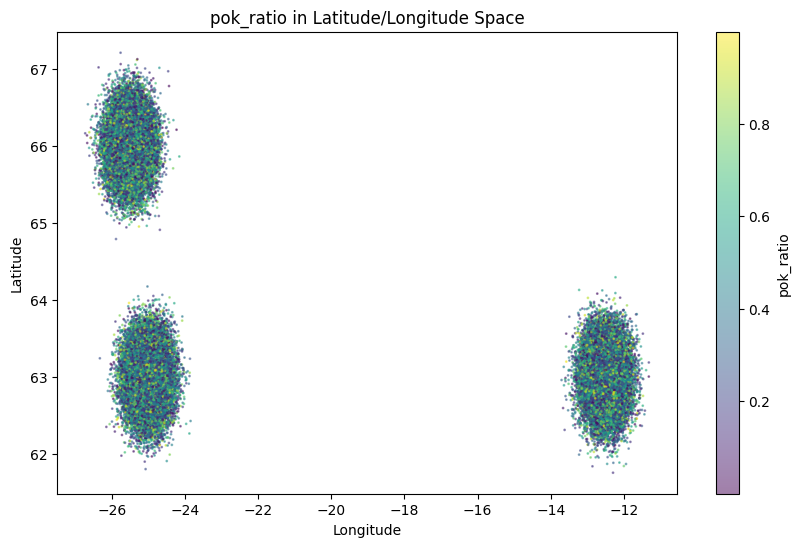

In [27]:
# plot pok_ratio in lat/lon space

plt.figure(figsize=(10, 6))
sc = plt.scatter(df['longitude'], df['latitude'], c=df['pok_ratio'], cmap='viridis', s=1, alpha=0.5)
plt.colorbar(sc, label='pok_ratio')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('pok_ratio in Latitude/Longitude Space')
plt.show()